In [3]:
import pandas as pd

data = pd.read_csv("video_list.csv")
mosei = pd.read_csv("mosei.csv")

In [4]:
# answer 데이터프레임과 unique_results_df를 병합
merged_df = pd.merge(data, mosei, on='id', how='inner')

# 중복 제거
merge_df = merged_df.drop_duplicates(subset=['id'])
print(len(merge_df))
print(merge_df)

2264
                id                                       link_x  \
0      -3g5yACwYnA  https://www.youtube.com/watch?v=-3g5yACwYnA   
6      -3nNcZdcdvU  https://www.youtube.com/watch?v=-3nNcZdcdvU   
9      -571d8cVauQ  https://www.youtube.com/watch?v=-571d8cVauQ   
12     -6rXp3zJ3kc  https://www.youtube.com/watch?v=-6rXp3zJ3kc   
15     -9YyBTjo1zo  https://www.youtube.com/watch?v=-9YyBTjo1zo   
...            ...                                          ...   
13409  zrFZAofNGi4  https://www.youtube.com/watch?v=zrFZAofNGi4   
13417  zuc7vUhZNfY  https://www.youtube.com/watch?v=zuc7vUhZNfY   
13419  zvZd3V5D5Ik  https://www.youtube.com/watch?v=zvZd3V5D5Ik   
13421  zwTrXwi54us  https://www.youtube.com/watch?v=zwTrXwi54us   
13434  zx4W0Vuus-I  https://www.youtube.com/watch?v=zx4W0Vuus-I   

                                        link_y  segment_id      start  \
0      https://youtube.com/watch?v=-3g5yACwYnA           0  82.753000   
6      https://youtube.com/watch?v=-3nNcZdcd

In [5]:
merge_df = merge_df.drop(columns=["link_x","link_y","segment_id", "start","end"])
print(merge_df)

                id  sentiment     happy       sad     anger  surprise  \
0      -3g5yACwYnA   1.000000  0.666667  0.666667  0.000000       0.0   
6      -3nNcZdcdvU   0.333333  1.666667  0.000000  0.000000       0.0   
9      -571d8cVauQ   0.000000  0.000000  0.000000  0.000000       0.0   
12     -6rXp3zJ3kc   0.000000  0.000000  0.333333  0.333333       0.0   
15     -9YyBTjo1zo  -1.000000  0.000000  0.000000  0.000000       0.0   
...            ...        ...       ...       ...       ...       ...   
13409  zrFZAofNGi4  -3.000000  0.000000  3.000000  0.000000       0.0   
13417  zuc7vUhZNfY   0.000000  2.000000  0.000000  0.000000       0.0   
13419  zvZd3V5D5Ik   1.666667  2.333333  0.000000  0.000000       0.0   
13421  zwTrXwi54us   0.000000  0.333333  0.000000  0.000000       0.0   
13434  zx4W0Vuus-I   1.000000  1.000000  0.000000  0.000000       0.0   

       disgust      fear  
0          0.0  0.666667  
6          0.0  0.000000  
9          0.0  0.000000  
12         0.0 

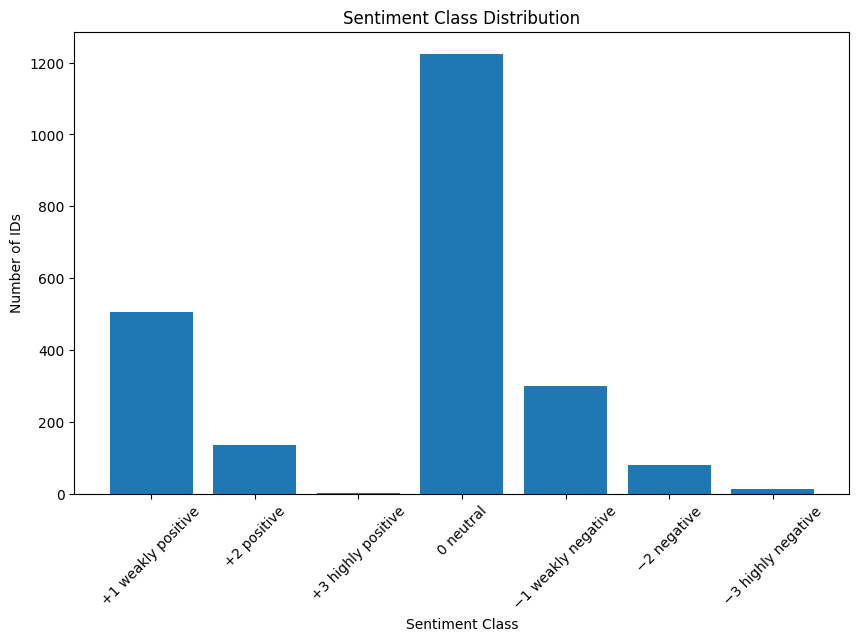

In [6]:
import matplotlib.pyplot as plt

# Sentiment 값에 따라 클래스를 매핑합니다.
def map_sentiment_to_class(sentiment):
    if sentiment >= 3:
        return "+3 highly positive"
    elif sentiment >= 2:
        return "+2 positive"
    elif sentiment >= 1:
        return "+1 weakly positive"
    elif sentiment >= 0:
        return "0 neutral"
    elif sentiment >= -1:
        return "−1 weakly negative"
    elif sentiment >= -2:
        return "−2 negative"
    else:
        return "−3 highly negative"

# Sentiment 열을 클래스로 매핑합니다.
merge_df['sentiment_class'] = merge_df['sentiment'].apply(map_sentiment_to_class)

# 클래스별 개수를 계산합니다.
sentiment_class_counts = merge_df['sentiment_class'].value_counts().sort_index()

# 막대 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.bar(sentiment_class_counts.index, sentiment_class_counts.values)

# 그래프에 레이블 추가
plt.xlabel('Sentiment Class')
plt.ylabel('Number of IDs')
plt.title('Sentiment Class Distribution')

# 그래프 표시
plt.xticks(rotation=45)
plt.show()


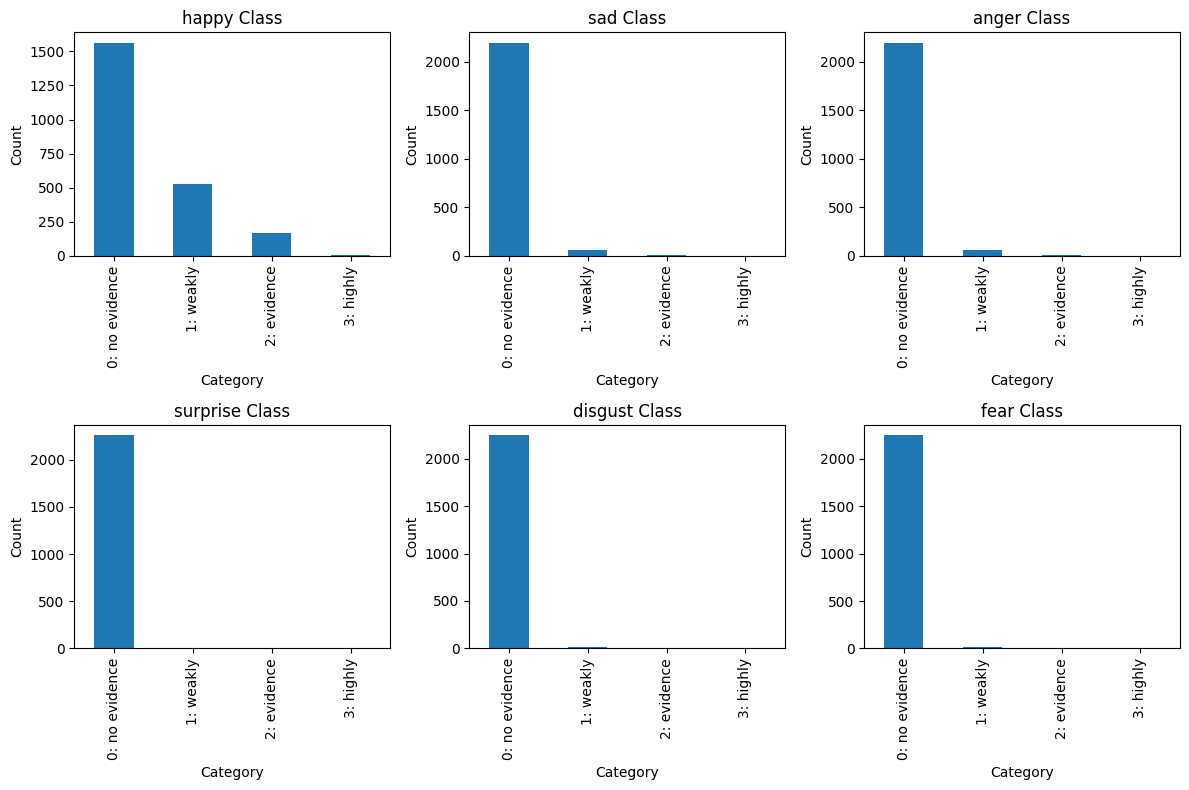

In [7]:
# 'happy', 'sad', 'anger', 'surprise', 'disgust', 'fear' 열의 값을 0부터 3까지의 범주로 그룹화합니다.
# 각 열에 대한 그룹을 생성합니다.
emotion_columns = ['happy', 'sad', 'anger', 'surprise', 'disgust', 'fear']
for emotion in emotion_columns:
    merge_df[emotion + '_category'] = pd.cut(merge_df[emotion], bins=[-0.1, 0.9, 1.9, 2.9, 3], labels=["0: no evidence", "1: weakly", "2: evidence", "3: highly"])

# 막대 그래프를 그립니다.
plt.figure(figsize=(12, 8))

for i, emotion in enumerate(emotion_columns):
    plt.subplot(2, 3, i+1)
    merge_df[emotion + '_category'].value_counts().sort_index().plot(kind='bar')
    plt.title(f'{emotion} Class')
    plt.xlabel('Category')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

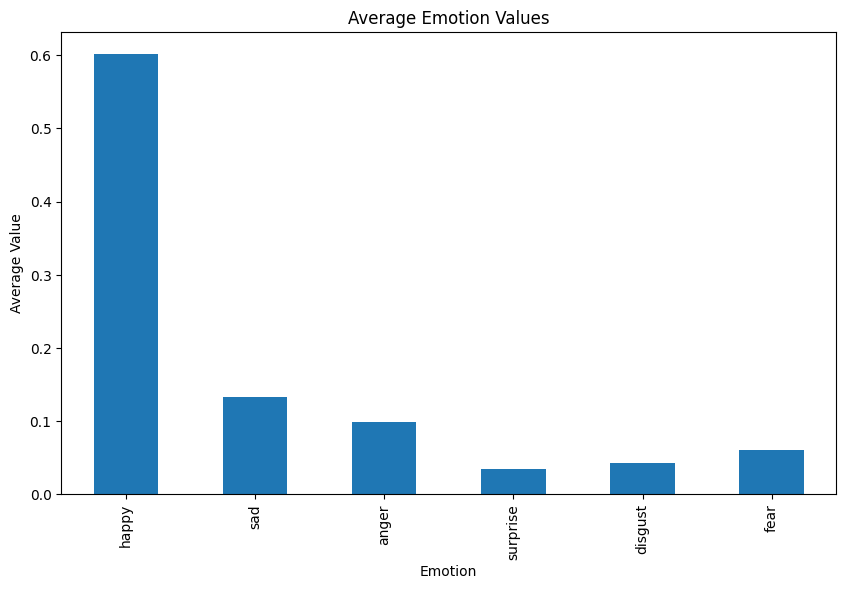

In [8]:
# 'happy', 'sad', 'anger', 'surprise', 'disgust', 'fear' 열의 평균을 계산합니다.
averages = merge_df[['happy', 'sad', 'anger', 'surprise', 'disgust', 'fear']].mean()

# 막대 그래프를 그립니다.
averages.plot(kind='bar', figsize=(10, 6))

# 그래프에 레이블 추가
plt.xlabel('Emotion')
plt.ylabel('Average Value')
plt.title('Average Emotion Values')

# 그래프 표시
plt.show()

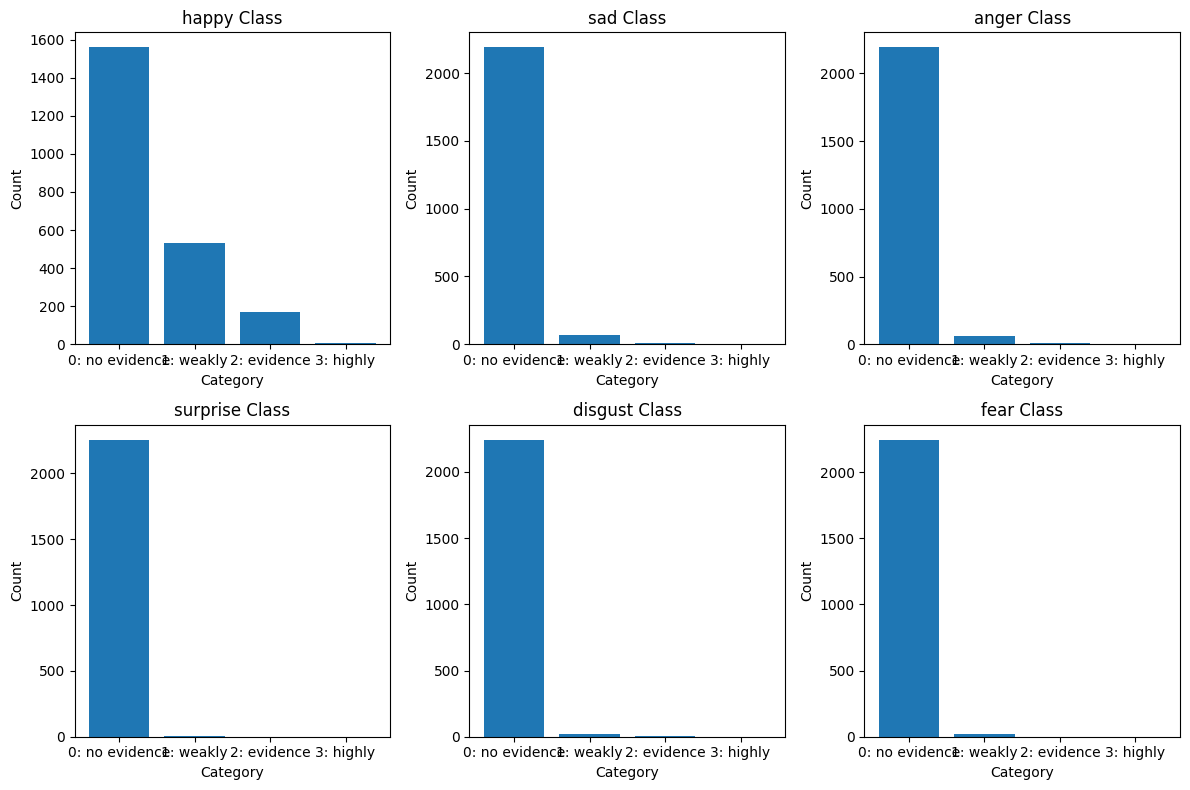

In [9]:
import matplotlib.pyplot as plt

emotion_columns = ['happy', 'sad', 'anger', 'surprise', 'disgust', 'fear']

# 'happy', 'sad', 'anger', 'surprise', 'disgust', 'fear' 열의 값을 0부터 3까지의 범주로 매핑합니다.
emotion_bins = [-0.1, 0.9, 1.9, 2.9, 3]
emotion_labels = ["0: no evidence", "1: weakly", "2: evidence", "3: highly"]

for emotion in emotion_columns:
    merge_df[emotion + '_category'] = pd.cut(merge_df[emotion], bins=emotion_bins, labels=emotion_labels)

# 막대 그래프를 그립니다.
plt.figure(figsize=(12, 8))

# 각 열에 대한 막대 그래프를 그립니다.
for i, emotion in enumerate(emotion_columns):
    plt.subplot(2, 3, i+1)
    
    # 각 범주별 개수를 계산하고 막대 그래프를 그립니다.
    emotion_counts = merge_df[emotion + '_category'].value_counts().sort_index()
    plt.bar(emotion_counts.index, emotion_counts.values)
    
    plt.title(f'{emotion} Class')
    plt.xlabel('Category')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()